# Predicting Forest Cover Types
## Mod 5 - Kaggle Competition - Machine Learning

By Valentina Fontiveros

![](park_photo.png)

### Introduction

This dataset was published by Kaggle.
The purpose is to create a model that correctly predict certain types of 
forest cover given environmental descriptors.

### Import Libraries

In [24]:
# data manipulation and calculation libraries
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

# Scaling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Components analysis
from sklearn.decomposition import PCA

# Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Models to be used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Model evaluation Metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 


### Read Data

In [2]:
# read data
train = pd.read_csv('train.csv', dtype = 'float')
test = pd.read_csv('test.csv', dtype = 'float')

### Data QC

In [3]:
print('FEATURE NAMES:')
print('')
print(train.columns)
print('')
print('o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o')
print('')
print('NUMBER OF FEATURES:')
print(len(train.columns))

FEATURE NAMES:

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil

In [4]:
# Set Record Id As Index
train.Id.astype('int',inplace=True)
test.Id.astype('int',inplace=True)
train.set_index('Id',inplace=True)  
test.set_index('Id',inplace=True)


/Users/valentina/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


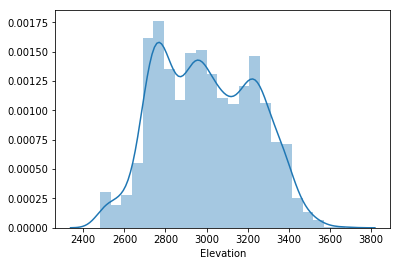

In [8]:
# Elevation in meters
sns.distplot(train[train.Wilderness_Area1 == 1].Elevation)

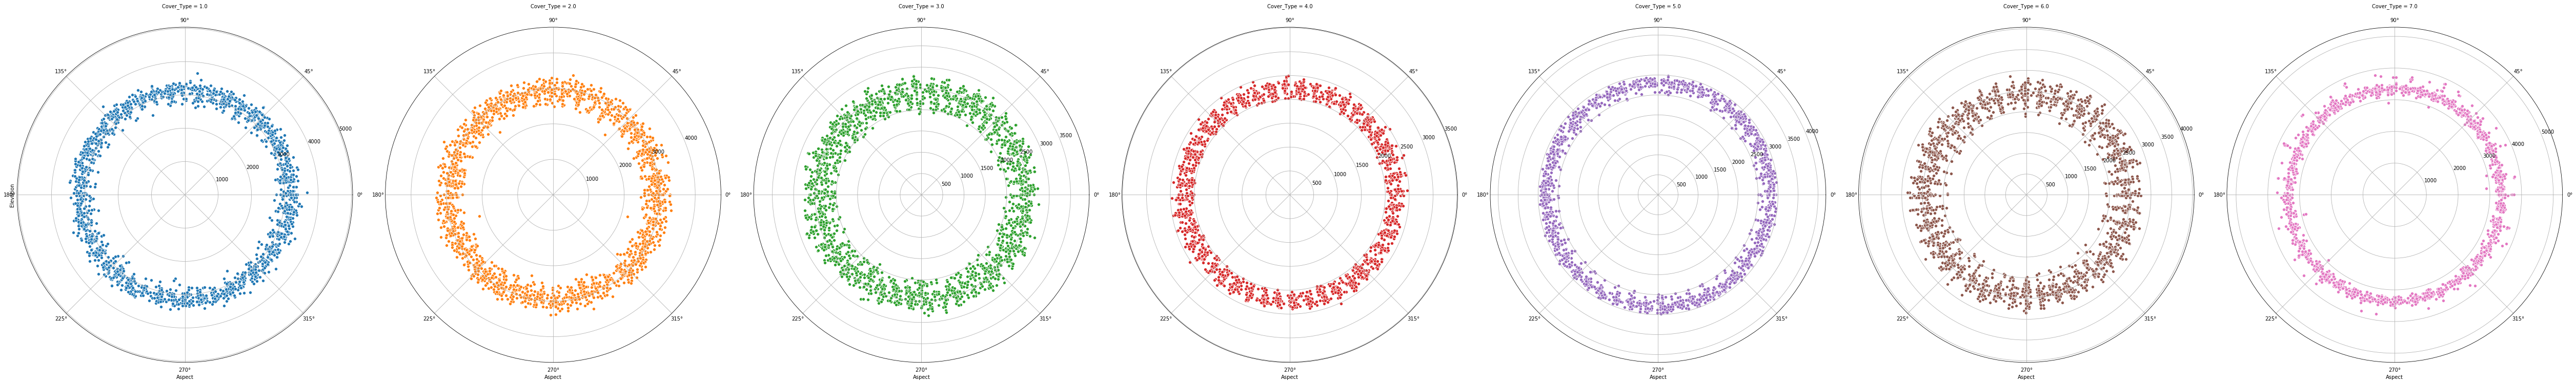

In [83]:
# aspect
g = sns.FacetGrid(train, col="Cover_Type", hue="Cover_Type",
                  subplot_kws=dict(projection='polar'), height=10,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "Aspect", "Elevation")

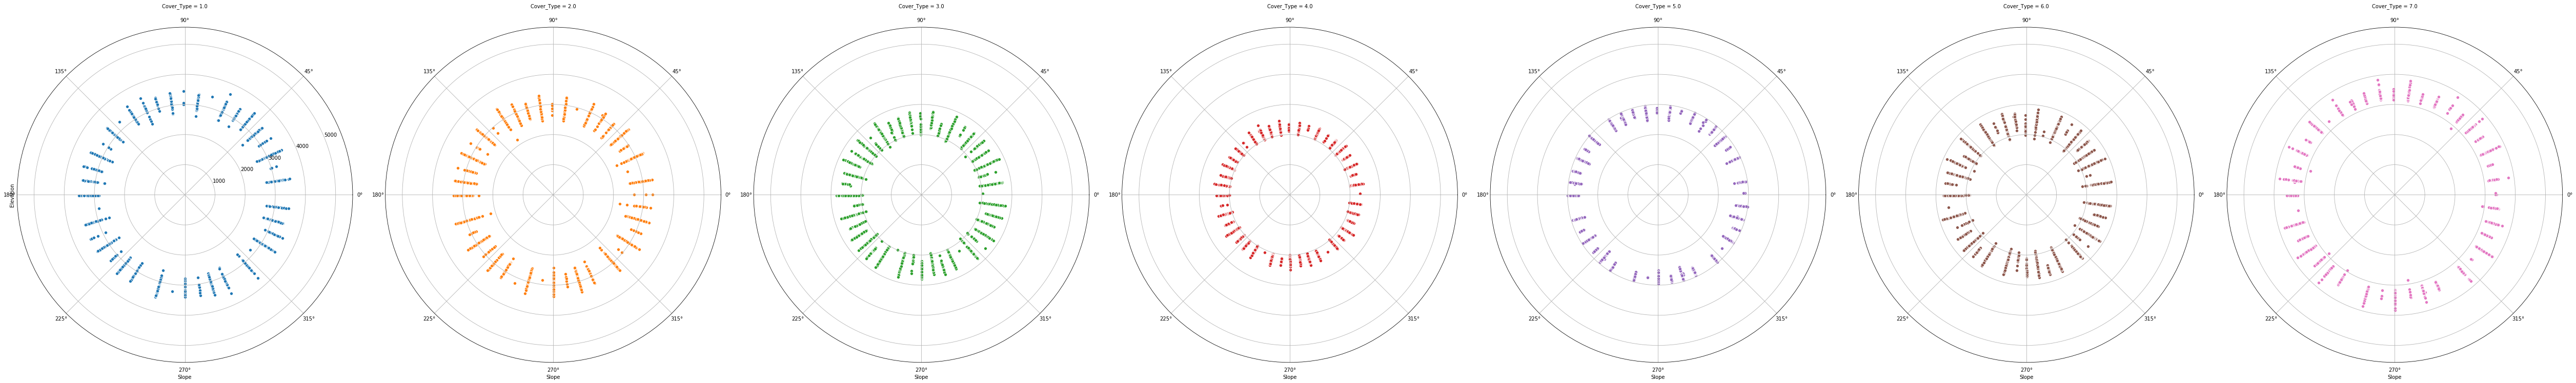

In [89]:
g = sns.FacetGrid(train, col="Cover_Type", hue="Cover_Type",
                  subplot_kws=dict(projection='polar'), height=10,
                  sharex=True, sharey=True, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "Slope", "Elevation")

In [88]:
train.Aspect.describe()

count    15120.000000
mean       156.676653
std        110.085801
min          0.000000
25%         65.000000
50%        126.000000
75%        261.000000
max        360.000000
Name: Aspect, dtype: float64

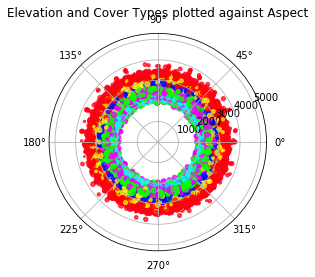

In [85]:
from matplotlib.pyplot import polar

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(train.Aspect, train.Elevation, c=train.Cover_Type, s=train.Slope, cmap='hsv', alpha=0.75)
ax.set_title('Elevation and Cover Types plotted against Aspect')
plt.show()

In [109]:
sns.distplot(train.Aspect,c=train.Cover_Type )
c = ax.scatter(train.Aspect,train.Aspect, c=train.Cover_Type)

TypeError: distplot() got an unexpected keyword argument 'c'

In [ ]:
# Conclusions: Aspect is not relevant to Forest Cover

In [64]:
p

Traceback (most recent call last):
  File "/Users/valentina/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/Users/valentina/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/Users/valentina/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/animation.py", line 1748, in _init_draw
    for a in self._drawn_artists:
TypeError: 'Figure' object is not iterable
MovieWriter ffmpeg unavailable. Trying to use html instead.


ValueError: outfile must be *.htm or *.html

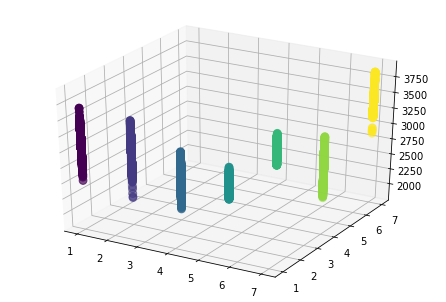

In [45]:
# 3D PLOT
from matplotlib import animation
fig = plt.figure()
ax = Axes3D(fig)
def init():
    ax.scatter(train.Cover_Type, train.Cover_Type, train.Elevation, c=train.Cover_Type, s=60)
    return fig
def animate(i):
    ax.view_init(elev=200, azim=i*4)
    return fig

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)

fn = 'cover_elevation_&_type'
ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)

import subprocess
cmd = 'magick convert %s.gif -fuzz 5%% -layers Optimize %s_r.gif'%(fn,fn)
subprocess.check_output(cmd)

plt.rcParams['animation.html'] = 'html5'
ani

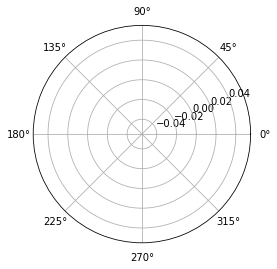

In [57]:
p = polar()

In [58]:
p

[]

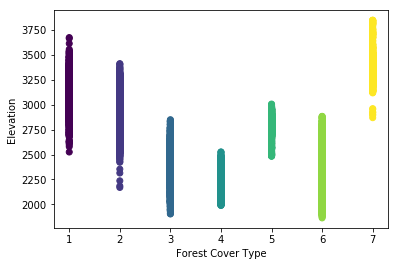

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train.Cover_Type, train.Elevation, c=train.Cover_Type)
plt.xlabel('Forest Cover Type')
plt.ylabel('Elevation')
plt.show()

In [ ]:
# delete outliers in elevation

In [ ]:
df=pd.DataFrame({'X': range(1,101), 'Y': np.random.randn(100)*15+range(1,101), 'Z': (np.random.randn(100)*15+range(1,101))*2 })
 
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c='skyblue', s=60)
ax.view_init(30, 185)
plt.show()


In [ ]:
continuous_vars = list(train.columns[0:10])
continuous_vars.append("Cover_Type")

sns.pairplot(train[continuous_vars], kind='scatter', hue="Cover_Type", plot_kws= {'alpha': 0.1})

In [ ]:
sns.distplot(train.Elevation, label='train')
sns.distplot(test.Elevation, label='test')
plt.legend()
plt.show()

In [ ]:
train_E_1 = train[train.Elevation.between(train.Elevation.min(),2250)]
train_E_2 = train[train.Elevation.between(2250,2500)]
train_E_3 = train[train.Elevation.between(2500,2625)]
train_E_4 = train[train.Elevation.between(2625,3000)]
train_E_41 = train[train.Elevation.between(2800,3250)]
train_E_5 = train[train.Elevation.between(3000,3250)]
train_E_6 = train[train.Elevation.between(3250,3500)]
train_E_7 = train[train.Elevation.between(3500,train.Elevation.max())]

In [ ]:
import random
train_1 = train_test_split(train_E_1, test_size=.9)[0]
train_2 = train_test_split(train_E_2, test_size=.7)[0]
train_3 = train_test_split(train_E_3, test_size=1)[0]
train_4 = train_test_split(train_E_4, test_size=1)[0]
train_4b = train_test_split(train_E_41, test_size=1)[0]
train_5 = train_test_split(train_E_5, test_size=1)[0]
train_5b = train_test_split(train_E_5, test_size=1)[0]
train_6 = train_test_split(train_E_6, test_size=1)[0]
train_7 = train_test_split(train_E_7, test_size=1)[0]


train2 = pd.concat([train_1,train_2,train_3,train_4b,train_4b,train_4b,train_5,train_4,train_4, train_5b, train_4b, train_6, train_7])   # make a dataset with same elevation distribution as test case

In [ ]:
sns.distplot((train2.Elevation), label='train2')
sns.distplot((test.Elevation), label='test')
plt.legend()
plt.show()

In [ ]:

train2.head()

In [ ]:
# after reviewing these distributions, and knowing that elevation is
# a major control on tree species, we should train model on a similar
# distribution
        

In [ ]:
# play visualizations with soil types, wilderness areas, and cover types

In [ ]:
plt.hist(test.Elevation)

In [ ]:
train.Elevation.describe()

In [ ]:
sns.distplot(train[train.Elevation> 2500].Elevation)
sns.distplot(test.Elevation)

### Preprocessing Steps - Scaling

In [ ]:

# create a list of features than don't include target/label
features = train2.columns[0:-1]

# Format training features and labels - X: features, y: labels
X = train2[features]
y_train = train2.Cover_Type # Series of Labels

print('Set index as Id and created feature and labeled dataframe.')

In [ ]:
# Standardization of Data - substracts mean value and divides by variance. 
# Result is in terms of variance ad us kess affected by outliers. Seems best choice.
scaler = StandardScaler()   
scaler.fit_transform(X)   # Scale data

# A Different scaler may be used, but data has many outliers. Thus first scaler preferred.
#scaler2 = MinMaxScaler
#scaler2.fit_transform(X)

# Scale features
X_train = pd.DataFrame(scaler.transform(X))
X_train.columns = X.columns

print('Scaled data using Standard Scaler.')

### Preprocessing - Feature Selection

In [ ]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train2 = sel.fit_transform(X_train)

In [ ]:
(X_train2).columns

### Classification Models

In [ ]:
# A function that calculates and prints model performance metrics

def performance(y_true, y_predict):
    acc = accuracy_score(y_true, y_predict)
    r2 = r2_score(y_true,y_predict)
    mse = mean_squared_error(y_true,y_predict)
    # Return the score
    return ['Accuracy: ',acc,'R-squared: ', r2,'Mean Squared Error: ',mse]



### Principal Component Analysis

In [ ]:
#pca = PCA(n_components=7)
#pca.fit(X_train)  

In [ ]:
#X_train_PCA = pd.DataFrame(pca.transform(X_train))

### RandomForest

In [ ]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
y_train_pred = forest_clf.predict(X_train)
print(performance(y_train,y_train_pred))
forest_clf.feature_importances_
#model = SelectFromModel(forest_clf, prefit=True)
#X_new = model.transform(X_train)
#X_new.shape               

In [ ]:
X_train.Soil_Type39.sum() == X_new[:,10].sum()

In [ ]:
X_new_df = pd.DataFrame(X_new)
X_new_df.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Soil_Type39']

In [ ]:
forest_clf.fit(X_new_df, y_train)
y_train_pred = forest_clf.predict(X_new_df)
print(performance(y_train,y_train_pred))


In [ ]:

#corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']
corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']


test.drop(corr_feats,axis=1,inplace=True)

#features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
#       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
#       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
#       'Horizontal_Distance_To_Fire_Points','Soil_Type39']

X_test = pd.DataFrame(scaler.transform(test))
X_test.columns = test.columns

#X_test2 = X_test[features]
#X_test2.columns = features

y_test_pred = forest_clf.predict(X_test)
            

data = [test.index, y_test_pred]

forest_submission = pd.DataFrame(data={'Id':test.index.astype('int'),'Cover_Type':y_test_pred.astype('int')})

# output
forest_submission.to_csv('random_forest.csv',index=False)
forest_submission.head()

In [ ]:
# features to be dropped
#corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Hillshade_Noon','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']
#train.drop(corr_feats,axis=1,inplace=True)

### K Nearest Neighbors

In [ ]:
def find_best_k(X_train, y_train, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_train)
        f1 = accuracy_score(y_train, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(best_score))

In [ ]:
find_best_k(X_train,y_train)

In [ ]:
kclf = KNeighborsClassifier()
kclf.fit(X_train,y_train)
y_train_pred = kclf.predict(X_train)
print(performance(y_train,y_train_pred))

In [ ]:
#test.set_index('Id',inplace=True) 
corr_feats = ['Aspect','Slope','Vertical_Distance_To_Hydrology','Hillshade_3pm','Soil_Type7','Soil_Type15','Soil_Type29','Wilderness_Area1']
test.drop(corr_feats,axis=1,inplace=True)

X_test = pd.DataFrame(scaler.transform(test))
X_test.columns = test.columns

y_test_pred = kclf.predict(X_test)

data = [test.index, y_test_pred]

knearest_submission = pd.DataFrame(data={'Id':test.index.astype('int'),'Cover_Type':y_test_pred.astype('int')})
k_nearest_submission.to_csv('k_nearest.csv',index=False)
knearest_submission.head()

### Decision Trees

In [ ]:
tclf= DecisionTreeClassifier()
tclf.fit(X_train,y_train) 
y_train_pred = tclf.predict(X_train)
print(performance(y_train,y_train_pred))

In [ ]:
tclf

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
print(performance(y_train,y_train_pred))

In [ ]:

plt.style.use('ggplot')

# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=45)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    score = performance(y_train, y_train_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [ ]:
min_samples_splits = np.arange(2,11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split), random_state=45)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    score = performance(y_train, y_train_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.legend()
plt.show()

### Support Vector Machines

In [ ]:
from sklearn import svm

vclf = svm.SVC()
vclf.fit(X_train, y_train)
y_train_pred = vclf.predict(X_train)
print(performance(y_train,y_train_pred))

### Ensemble Methods XGBoost

In [ ]:
from sklearn.metrics import accuracy_score
clf = xgb.XGBClassifier()


In [ ]:
clf.fit(X_train, y_train)


In [ ]:
y_train_pred = clf.predict(X_train)
print(performance(y_train,y_train_pred))

### Tuning Classifier

In [ ]:
list(range(100,500,50))

In [ ]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [3],
    'min_child_weight': [10],
    'subsample': [1],
    'n_estimators': range(100,500,100)
}

In [ ]:


grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
#val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, y_train_pred)
#val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
#print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

### Submission Formatting

In [ ]:
submission_df.to_csv('fourth_pass.csv',index=False)